# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

print(os.getcwd())

C:\Users\Praveen\Downloads


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [5]:
df = pd.read_csv(r'C:\Users\Praveen\Downloads\DataScienceGuidedCapstone-master\data\ski_data_step3_features.csv')
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio,total_chairs_runs_ratio,total_chairs_skiable_ratio,fastQuads_runs_ratio,fastQuads_skiable_ratio
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,0.410091,0.450867,0.706140,0.434783,0.500000,0.948276,0.092105,0.004348,0.026316,0.001242
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,0.410091,0.450867,0.280702,0.130435,0.250000,NaN,0.111111,0.006250,0.000000,0.000000
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,0.410091,0.450867,0.013158,0.434783,0.250000,0.051724,0.230769,0.100000,0.000000,0.000000
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,0.027477,1.754540,0.492708,0.514768,0.666667,NaN,0.145455,0.010296,0.000000,0.000000
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,0.027477,1.754540,0.507292,0.485232,0.333333,1.000000,0.107692,0.008750,0.015385,0.001250


In [6]:
print(df.shape)
df.groupby('state')['AdultWeekend'].agg(['min','max','mean']).sort_values(by='mean',ascending=False)

(277, 36)


,min,max,mean
state,,,
Utah,50.00,169.00,93.000000
Colorado,25.00,179.00,90.714286
Vermont,73.00,119.00,87.900000
Arizona,78.00,89.00,83.500000
California,47.00,159.00,81.416667
Nevada,20.00,135.00,81.000000
New Jersey,79.99,79.99,79.990000
West Virginia,68.00,92.00,79.750000
Maryland,79.00,79.00,79.000000


In [7]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['AdultWeekend','Name','Region','state']),df['AdultWeekend'],random_state=16)
print('data split done')

data split done


In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((207, 32), (70, 32), (207,), (70,))

In [10]:
pipe = make_pipeline(
    SimpleImputer(strategy = 'median'),
    StandardScaler(),
    SelectKBest(f_regression, k=15),
    LinearRegression()
)
print('pipe created')

pipe created


In [11]:
X_train.head()

,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,triple,double,surface,...,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio,total_chairs_runs_ratio,total_chairs_skiable_ratio,fastQuads_runs_ratio,fastQuads_skiable_ratio
28,9895,2010,7885,0,0,0,0,1,2,0,...,0.382028,21.134744,0.015567,0.030694,0.013514,NaN,0.044776,0.004412,0.000000,0.000000
170,1250,450,750,0,0,0,1,0,2,2,...,0.169635,60.489414,0.012514,0.041946,0.013889,0.024330,0.357143,0.072464,0.000000,0.000000
33,720,550,170,0,0,0,0,1,2,2,...,0.140242,90.203861,0.223464,0.226629,0.400000,0.156250,0.263158,0.062500,0.000000,0.000000
72,2006,1000,1006,0,0,3,0,1,0,4,...,0.159594,104.225886,0.096055,NaN,0.111111,0.178388,0.296296,0.071429,0.111111,0.026786
225,10970,1548,9600,0,0,1,0,6,1,0,...,0.405495,15.312673,0.021306,0.096503,0.076923,NaN,0.112676,0.012308,0.014085,0.001538


In [12]:
model=pipe.fit(X_train,y_train)

In [13]:
y_pred = pipe.predict(X_test)
print("Adult weekend prices are predicted successfully")

Adult weekend prices are predicted successfully


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [15]:
r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)

(0.7643637584173837, 10.087125281603914, 180.59404579531696)

In [16]:
df[df['Name'].str.contains('Big Mountain')]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio,total_chairs_runs_ratio,total_chairs_skiable_ratio,fastQuads_runs_ratio,fastQuads_skiable_ratio
124,Big Mountain Resort,Montana,Montana,6817,2353,4464,0,0,3,2,...,1.122778,8.161045,0.140121,0.129338,0.148148,0.84507,0.133333,0.004667,0.028571,0.001


In [17]:
pipe.predict(df[df['Name'].str.contains('Big Mountain')].drop(columns=['Name','Region','state','AdultWeekend']))

array([89.10585742])

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [23]:
df.loc[df.Name =='Big Mountain Resort','AdultWeekend'].values.item()

81.0

**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

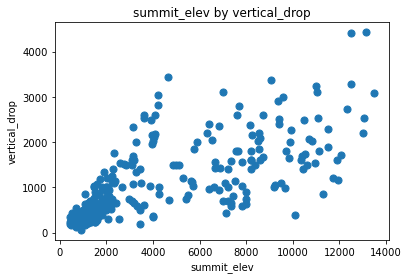

In [24]:
plt.scatter(df['summit_elev'], df['vertical_drop'], s=50, cmap='viridis')
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop')
plt.savefig('../fig1.png',bbox_inches='tight')

## Finalize Code

Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and python scripts you have created and clean them n=up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model out a callable object using pickle for future use in a data pipeline. Run the example code below to save out your callable model, notice we save it in the models folder we created in our previous guided capstone.
 

In [31]:

import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, r'C:\Users\Praveen\Downloads\DataScienceGuidedCapstone-master\models\regression_model_adultweekend.joblib')

['C:\\Users\\Praveen\\Downloads\\DataScienceGuidedCapstone-master\\models\\regression_model_adultweekend.joblib']

# Finalize Documentation

For model documentation we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file then upload it to your github repository.



In [33]:
pipe.named_steps['linearregression'].coef_

array([ 0.52637623,  6.43140149, -0.60740818,  4.95058682,  4.27498585,
        4.19679733,  5.58744929, -0.52407271,  0.1305489 , -6.76188861,
        3.32734425,  1.65079966,  2.15496531,  0.33645273,  1.537931  ])

In [36]:
col_bool=pipe.named_steps['selectkbest'].get_support()
features=[]
for i,k in zip(col_bool,df.drop(columns=['Name','Region','state','AdultWeekend']).columns):
    if i:
        features.append(k)
features

['summit_elev',
 'vertical_drop',
 'trams',
 'fastSixes',
 'fastQuads',
 'total_chairs',
 'Runs',
 'TerrainParks',
 'LongestRun_mi',
 'SkiableTerrain_ac',
 'Snow Making_ac',
 'daysOpenLastYear',
 'averageSnowfall',
 'projectedDaysOpen',
 'fastQuads_runs_ratio']

In [37]:

coef_df=pd.DataFrame({'Coefficient_name':features,'Coefficient_value':pipe.named_steps['linearregression'].coef_})

In [38]:
coef_df

,Coefficient_name,Coefficient_value
0,summit_elev,0.526376
1,vertical_drop,6.431401
2,trams,-0.607408
3,fastSixes,4.950587
4,fastQuads,4.274986
5,total_chairs,4.196797
6,Runs,5.587449
7,TerrainParks,-0.524073
8,LongestRun_mi,0.130549
9,SkiableTerrain_ac,-6.761889


In [39]:
#Adding metrics
coef_df.loc[len(coef_df.index)]=['R2_score',r2_score(y_test,y_pred)]
coef_df.loc[len(coef_df.index)]=['mean_absolute_error',mean_absolute_error(y_test,y_pred)]
coef_df.loc[len(coef_df.index)]=['mean_squared_error',mean_squared_error(y_test,y_pred)]

In [40]:
coef_df

,Coefficient_name,Coefficient_value
0,summit_elev,0.526376
1,vertical_drop,6.431401
2,trams,-0.607408
3,fastSixes,4.950587
4,fastQuads,4.274986
5,total_chairs,4.196797
6,Runs,5.587449
7,TerrainParks,-0.524073
8,LongestRun_mi,0.130549
9,SkiableTerrain_ac,-6.761889


In [43]:
coef_df.to_csv(r'C:\Users\Praveen\Downloads\DataScienceGuidedCapstone-master\data/step_6_coef_values.csv')
print('CSV Saved')

CSV Saved
